In [6]:
# Loading all packages + ignoring warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import linear_model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import requests
from datetime import datetime
import json
import matplotlib
import statsmodels.api as sm
from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

True
-----
True
-----
True
-----
True
-----
True
-----
   Year  Month  Average_GI_job  Average_GI_dagpenge  Average_GI_kontanthjælp  \
0  2007      1              93                   47                       22   
1  2007      2              84                   35                       22   
2  2007      3              74                   42                       24   
3  2007      4              72                   30                       18   
4  2007      5              74                   32                       24   

   Average_GI_akasse  Average_GI_jobnet  
0                 37                 34  
1                 28                 33  
2                 35                 33  
3                 32                 28  
4                 28                 31  


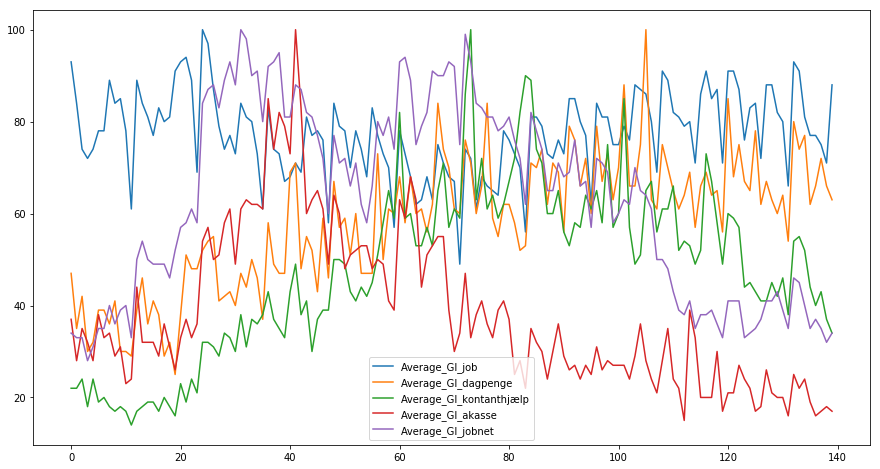

In [10]:
# Request urls for data for different keyword searches
url_job = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4fe6-2dsET3xP7h1Y3OweS11kacFLhU&tz=-120'
url_dagpenge = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22dagpenge%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffDqYGsvDiXLzsbRtwEuGUVj_gICFU&tz=-120'
url_kontanthjælp = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22kontanthj%C3%A6lp%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffJ7sJM8lV9LeHcUdNOKX43WYeIRWn&tz=-120'
url_akasse = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22a-kasse%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffTdu5RMRJshD0S9n7rP1AvC-sah16&tz=-120'
url_jobnet = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22jobnet%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffsYDR_Of8TjMQhVk5wt0TMZzRgKuT&tz=-120'

# Blacklist
#url_arbejdsløs = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22arbejdsl%C3%B8s%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4aT9nXvFVzgx4l6U0RtVOEl_spRZ3J_&tz=-120'
#url_jobindex = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22jobindex%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4at229ZiMy59btGP0Mmnbl8mLSJz85a&tz=-120'

url_list = [url_job,
            url_dagpenge,
            url_kontanthjælp,
            url_akasse,
            url_jobnet
           ]

combined_list = []

for j in url_list:
    response = requests.get(j)
    print(response.ok)
    print('-----')
    dict_ = json.loads(response.text.split(")]}\',\n")[1])

    # saving length of the timelineData dict
    dict_length = len(dict_['default']['timelineData'])

    timelinedata_list = [] 

    for i in range(0,dict_length):
        # Extracting value (keyword: 'time')
        time = dict_['default']['timelineData'][i]['time']
    
        year = datetime.utcfromtimestamp(int(time)).strftime('%Y')
        month = datetime.utcfromtimestamp(int(time)).strftime('%m')
        # Extracting value (keyword: 'value'). Pulling out first element, since list with one element.
        value = dict_['default']['timelineData'][i]['value'][0]
    
    
        help_list =[]
        if j == url_list[0]:
            help_list.append(year)
            help_list.append(month)
        help_list.append(value)
        timelinedata_list.append(help_list)
    
    if j == url_list[0]:
        for l in range(0, len(timelinedata_list)):
            
            combined_list.append(timelinedata_list[l])
    else:
        for k in range(0,len(timelinedata_list)):
            combined_list[k].append(timelinedata_list[k][0])

df = pd.DataFrame(combined_list)
df.columns = ['Year', 'Month',
              'Average_GI_job',
              'Average_GI_dagpenge',
              'Average_GI_kontanthjælp', 
              'Average_GI_akasse',
              'Average_GI_jobnet'
             ]

df2 = df.groupby(['Year', 'Month'], as_index=False).mean()
df2.plot(figsize=(15,8))

df2.to_csv("googledata29082018.csv", index=False)
df2 = pd.read_csv("googledata29082018.csv")
print(df2.head())

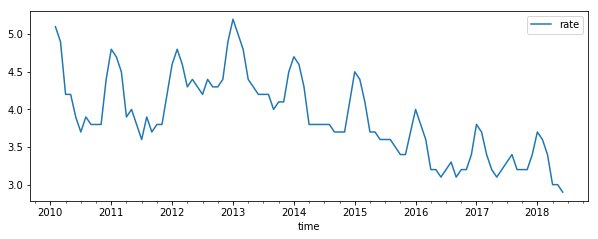

In [11]:
###-------------User input start----------------###
# Number of lags for explanatory variables
n_lags = 1
# Should be set to 1 for seasonally adjusted unemployment data and 0 otherwise
season_adjustment = 0
# Specify type of unemployment - 'ILO-unemp', 'Net unemp' or 'Gross unemp'
unemp_type = 'Net unemp'
# Number of months from 2007-01 to cut
cut_n_months = 36
###--------------User input end-----------------###

# Importing unemployment data from statbank.dk
AKUurl = 'https://api.statbank.dk/v1/data/AKU125/CSV?lang=en&valuePresentation=Value&timeOrder=Descending&delimiter=Semicolon&allowVariablesInHead=true&S%C3%86SON=11&S%C3%86SON=10&BESKSTATUS=LPCT&TID=*'
AKUcsv = pd.read_csv(AKUurl, sep = ";")
unemp_url = 'https://api.statbank.dk/v1/data/AUS07/CSV?lang=en&valuePresentation=Value&timeOrder=Descending&delimiter=Semicolon&allowVariablesInHead=true&YD=TOT&YD=NET&TID=*&SAESONFAK=9&SAESONFAK=22'
raw_unemp = pd.read_csv(unemp_url, sep = ";")

# Reshaping and constructing dummies for filtering
AKUcsv['season_adj'] = np.where(AKUcsv['SÆSON'] == 'Non-seasonally adjusted', 0, 1)
AKUcsv.columns = ['todrop', 'type', 'time', 'rate', 'season_adj']
AKUcsv['type'] = AKUcsv['type'].str.replace(r'rate', r'')
AKU = AKUcsv.drop('todrop', axis=1)
raw_unemp['season_adj'] = np.where(raw_unemp['SAESONFAK'] == 'Seasonally adjusted figures in percent of the labour force', 1, 0)
raw_unemp.columns = ['type', 'time', 'SAESONFAK', 'rate', 'season_adj']
unemp = raw_unemp.drop('SAESONFAK', axis=1)

# Merge data 
df_all = pd.concat([AKU, unemp], ignore_index=True)
#print(df_all.head())

# Convert variable time to date format and sort by date
df_all['time'] = df_all['time'].str.replace(r'\D', r' ')
df_all['time'] = pd.to_datetime(df_all['time'], format = "%Y %m" )
df_all = df_all.sort_values('time')

# Shortening of type names
df_all['type'] = df_all['type'].str.replace(r'unemployment', r'unemp')
df_all['type'] = df_all['type'].str.strip()
#print(df_all)

# Creating df that contains data for relevant type of unemployment.
unemp_rates = df_all[(df_all['season_adj']==season_adjustment) & (df_all['type']==unemp_type)].drop(columns='season_adj')
unemp_rates = unemp_rates.reset_index(drop=True)

# Copying unemployment rates for creating first difference variable later
unemp_rates_first_diff = unemp_rates.copy()

# Create varaible lagged unemplyment rate
df2['unemp_lag1'] = unemp_rates['rate'].shift(n_lags)

# Create variables for lagged average GIs
df3 = df2.copy()
df3['GI_job_lag1'] = df3['Average_GI_job'].shift(n_lags)
df3['GI_dagpenge_lag1'] = df3['Average_GI_dagpenge'].shift(n_lags)
df3['GI_kontanthjælp_lag1'] = df3['Average_GI_kontanthjælp'].shift(n_lags)
df3['GI_a-kasse_lag1'] = df3['Average_GI_akasse'].shift(n_lags)
df3['GI_jobnet_lag1'] = df3['Average_GI_jobnet'].shift(n_lags)

# Removing first observation in both dataframes, sinces df3 now contains NA i first row
# Additionally ensuring that d4 and unemp_rates have the same number of columns
df4 = df3[(n_lags+cut_n_months):len(unemp_rates)]
unemp_rates = unemp_rates[(n_lags+cut_n_months):]


# Construction X and y
X = np.array(df4[['GI_job_lag1',
                  'GI_dagpenge_lag1',
                  'GI_kontanthjælp_lag1', 
                  'GI_a-kasse_lag1',
                  'GI_jobnet_lag1',
                  'unemp_lag1'
                 ]]) # creating ndarray of X values (2 variables)
X_ar = np.array(df4[['unemp_lag1']]) # creating ndarray of X values (2 variables)
y = np.array(unemp_rates[['rate']])


# Security check to ensure that length of variable lists match.
if (len(X)-len(y)!=0):
    print('-------------------------------------------------------------------')
    print('----WARNING: Number of observations in X and y does not match!!----')
    print('---------------Length of y: ' + str(len(y)) + '. Length of X: ' + str(len(X)) + '------------------')
    print('-------------------------------------------------------------------')
unemp_rates.plot(x='time', y='rate', figsize=(10,3.5))

# Constructing first diff y
unemp_rates_first_diff['unemp_rate_fd'] = unemp_rates_first_diff['rate']-unemp_rates_first_diff['rate'].shift(1)
unemp_rates_first_diff = unemp_rates_first_diff[1+cut_n_months:]
y_fd = np.array(unemp_rates_first_diff[['unemp_rate_fd']])


In [12]:
# Split into continous time series
###----------------User input start------------------###
train_share = 0.5
valuation_share = 0.3
test_share = 0.2
# Specify X - should be either 'X' og 'X_ar' (autoregressive).
X_type = X
# Specify y - should be either y or y_fd (first diff)
y = y
###-----------------User input end-------------------###

dev_share = train_share + valuation_share

# Constructing samples split
X_dev_ts = X_type[:int(len(X_type)*dev_share)]
X_train_ts = X_type[:int(len(X_type)*train_share)]
X_val_ts = X_type[int(len(X_type)*train_share):int(len(X_type)*dev_share)]
X_test_ts = X_type[int(len(X_type)*dev_share):] 

if (len(X_train_ts)+len(X_val_ts)+len(X_test_ts))!= len(X_type):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(X_dev_ts): ' + str(len(X_dev_ts)))
    print('len(X_train_ts): ' + str(len(X_train_ts)))
    print('len(X_val_ts): ' + str(len(X_val_ts)))
    print('len(X_test_ts): ' + str(len(X_test_ts)))

y_dev_ts = y[:int(len(y)*dev_share)]    
y_train_ts = y[:int(len(y)*train_share)]
y_val_ts = y[int(len(y)*train_share):int(len(y)*(dev_share))]
y_test_ts = y[int(len(y)*dev_share):] 

if (len(y_train_ts)+len(y_val_ts)+len(y_test_ts))!= len(y):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(y_dev_ts): ' + str(len(y_dev_ts)))
    print('len(y_train_ts): ' + str(len(y_train_ts)))
    print('len(y_val_ts): ' + str(len(y_val_ts)))
    print('len(y_test_ts): ' + str(len(y_test_ts)))

len(X_dev_ts): 80
len(X_train_ts): 50
len(X_val_ts): 30
len(X_test_ts): 21
len(y_dev_ts): 80
len(y_train_ts): 50
len(y_val_ts): 30
len(y_test_ts): 21


In [63]:
# ------Lasso/Ridge------- #
###---------------User input start-----------------###
# Specify which model to use - either 'Lasso' or linear_model.Ridge
use_model = linear_model.Ridge
# Specify polynomial degree to allow
n_degree = 1
###----------------User input end------------------###
test_mse_list = [] 
#for n_degree in range(1,11):
perform = []
lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), 
                               StandardScaler(),
                               use_model(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train_ts, y_train_ts)
    y_pred_ts = pipe_lasso.predict(X_val_ts) # Transformation?
    perform.append(mse(y_pred_ts, y_val_ts))

hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    

# using optimal lambda in new pipe
pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), # dont use poly features for OLS
                           StandardScaler(),
                           use_model(alpha=optimal.index[0]))

pipe_lasso.fit(X_dev_ts,y_dev_ts) # Fitting model to development data set using new pipe
print('n_degree:' + str(n_degree))
print('Test mse:', round(mse(pipe_lasso.predict(X_test_ts),y_test_ts), 3))
print('Train mse:', round(mse(pipe_lasso.predict(X_train_ts),y_train_ts), 3))
#test_mse_list.append(mse(pipe_lasso.predict(X_test_ts),y_test_ts))
test_mse_df = pd.DataFrame(test_mse_list)
# print(test_mse_df)

y_pred_ts = pipe_lasso.predict(X_test_ts)
df_y_test_ts = pd.DataFrame(y_test_ts)
df_y_pred_ts = pd.DataFrame(y_pred_ts)

df_ts = pd.DataFrame()
df_ts['y_test'] = df_y_test_ts[0]
df_ts['y_pred'] = df_y_pred_ts[0]
df_ts['Year_month'] = np.array(unemp_rates['time'][int(len(y)*dev_share):])
df_ts.set_index('Year_month', inplace=True)
# df_ts.plot(ylim = [2,4])
#test_mse_df.plot()

#df_lasso = df_ts.copy()
df_ridge = df_ts.copy()

n_degree:1
Test mse: 0.028
Train mse: 0.046


In [66]:
#df_ridge['y_pred_ridge'] = df_ridge['y_pred'] 
#df_ridge.drop('y_pred', axis=1)
print(df_lasso)
dfxx = pd.merge(df_lasso, df_ridge, on = 'Year_month', how='left').drop(columns='y_test_y')

            y_test    y_pred
Year_month                  
2016-10-01     3.2  3.037054
2016-11-01     3.2  3.198098
2016-12-01     3.4  3.124640
2017-01-01     3.8  3.504790
2017-02-01     3.7  3.475771
2017-03-01     3.4  3.448559
2017-04-01     3.2  3.260740
2017-05-01     3.1  3.243049
2017-06-01     3.2  3.087021
2017-07-01     3.3  3.115344
2017-08-01     3.4  3.401154
2017-09-01     3.2  3.237618
2017-10-01     3.2  3.120782
2017-11-01     3.2  3.216389
2017-12-01     3.4  3.226681
2018-01-01     3.7  3.567618
2018-02-01     3.6  3.391531
2018-03-01     3.4  3.367014
2018-04-01     3.0  3.330177
2018-05-01     3.0  3.114372
2018-06-01     2.9  3.107107


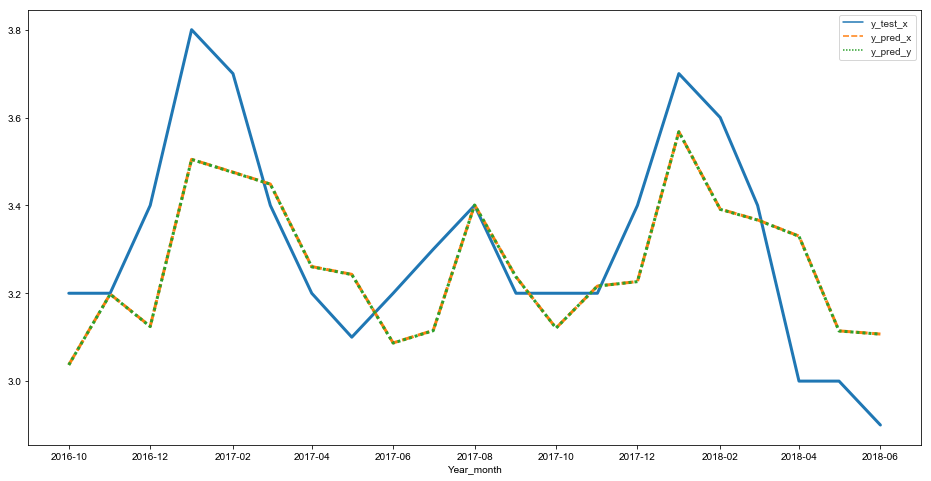

In [67]:
from matplotlib import pyplot
#fig, ax = pyplot.subplots(figsize = (15,8))
#df_lasso.plot(ax=ax[0])
#df_ridge.plot(ax=ax[1])

import seaborn as sns
fig, ax = pyplot.subplots(figsize = (16, 8))
sns.set_style("white")
sns.lineplot(ax=ax, data = dfxx, linewidth = 3, alpha = 1)



In [ ]:
#--------OLS----------#
print(X_dev_ts)

model = sm.OLS(y_dev_ts, X_dev_ts).fit()
predictions = model.predict(X_test_ts)
model.summary()
print('OLS', round(mse(predictions,y_test_ts), 4))


X_dev_ts_p = PolynomialFeatures(degree=1).fit_transform(X_dev_ts)
X_test_ts_p = PolynomialFeatures(degree=1).fit_transform(X_test_ts)

reg = LinearRegression().fit(X_dev_ts_p, y_dev_ts)
mse(reg.predict(X_test_ts_p),y_test_ts)
pred2 = reg.predict(X_test_ts_p)



df_y_test_OLS = pd.DataFrame(y_test_ts)
df_y_pred_OLS = pd.DataFrame(predictions)
df_OLS = pd.DataFrame()
df_OLS['y_test'] = df_y_test_OLS[0]
df_OLS['y_pred'] = df_y_pred_OLS[0]
print(df_OLS)
df_OLS['Year_month'] = np.array(unemp_rates['time'][int(len(y)*dev_share):])
df_OLS.set_index('Year_month', inplace=True)

df_OLS.plot(ylim = [2,4])

